### Clustering sugli allenatori

In [12]:
%matplotlib notebook

In [1]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
import warnings
from sklearn.cluster import DBSCAN # To instantiate and fit the model
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import KMeans

warnings.filterwarnings('ignore')

#PATH dove andare a leggere e a scrivere
PATH_TO_WRITE_ETL = "./dataset_modificato_WC/"
PATH_FROM_READ_ETL = "./dataset_originale_WC/"
PATH_FROM_READ_ANALYSIS = "./dataset_modificato_WC/" 

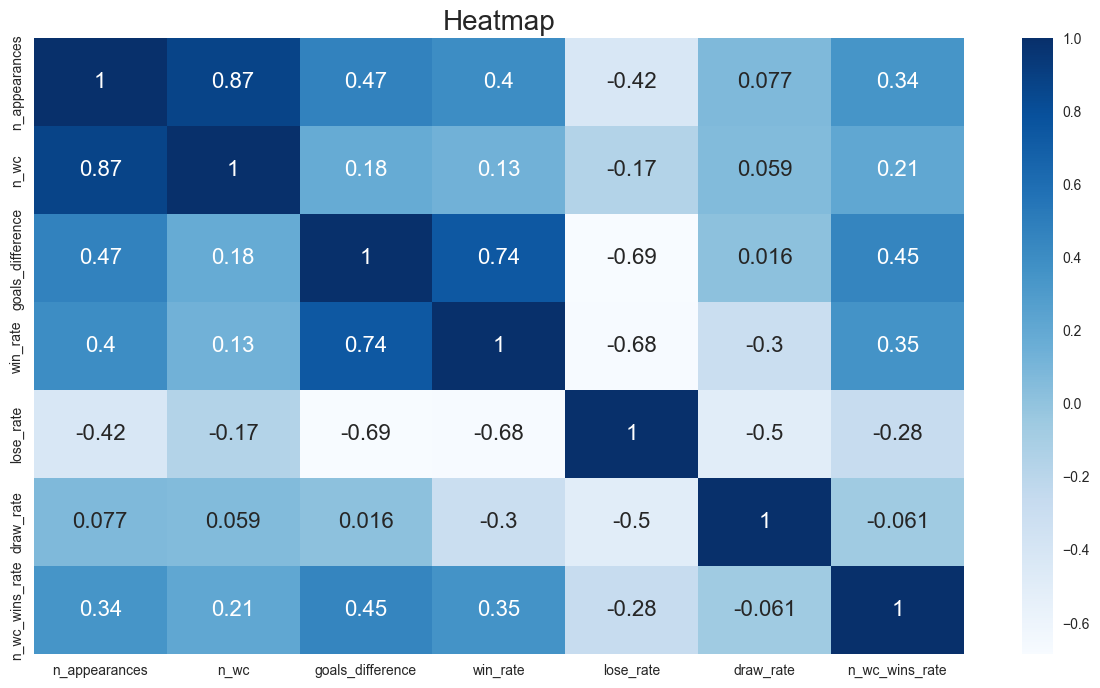

In [4]:
#eliminazione e filtraggio colonne
df_manager_stats = pd.read_csv("./stats/stats_managers.csv")
plt.figure(figsize=(15,8))
df_manager_stats["win_rate"] = df_manager_stats["win"]/df_manager_stats["n_appearances"]
df_manager_stats["lose_rate"] = df_manager_stats["lose"]/df_manager_stats["n_appearances"]
df_manager_stats["draw_rate"] = df_manager_stats["draw"]/df_manager_stats["n_appearances"]
df_manager_stats["n_wc_wins_rate"] = df_manager_stats["n_wc_wins"]/df_manager_stats["n_wc"]

df_manager_stats.drop(inplace=True,columns=["win","lose","draw","n_wc_wins"])
#df_manager_stats.drop(inplace=True,columns=["n_wc"])
#df_manager_stats.drop(inplace=True,columns=["goals_difference"])
sns.heatmap(df_manager_stats.drop(["manager_id"], axis=1).corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()

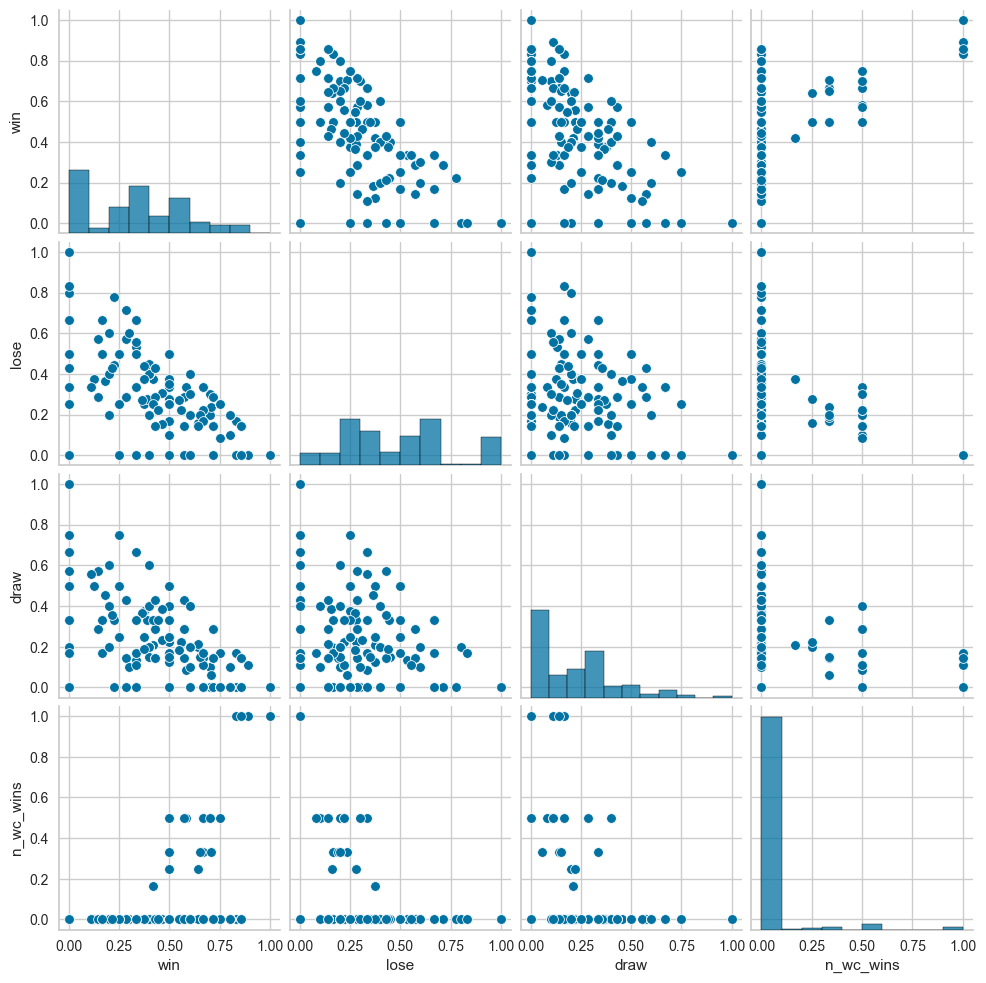

In [72]:
sns.pairplot(df_manager_stats.drop(["manager_id"], axis=1))

3.767383452909695e-17 1.0
(357, 7)


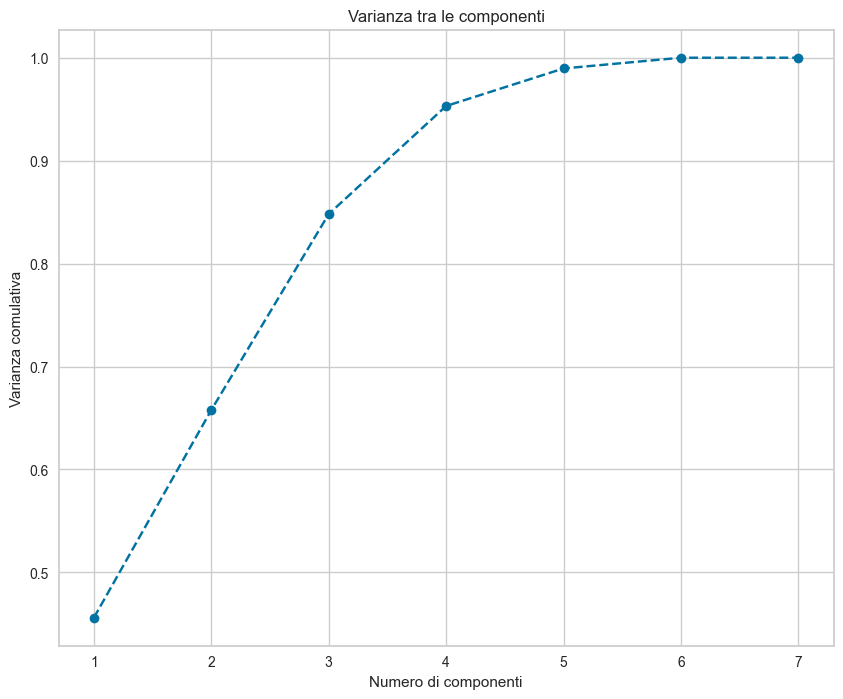

In [5]:
df_player_stats_std = KMeans.normalize_df(df_manager_stats.drop(columns=["manager_id"]))
KMeans.plot_variance_ratio(df_player_stats_std)

#should select value with 80% information

Numero di cluster (k-means): 9


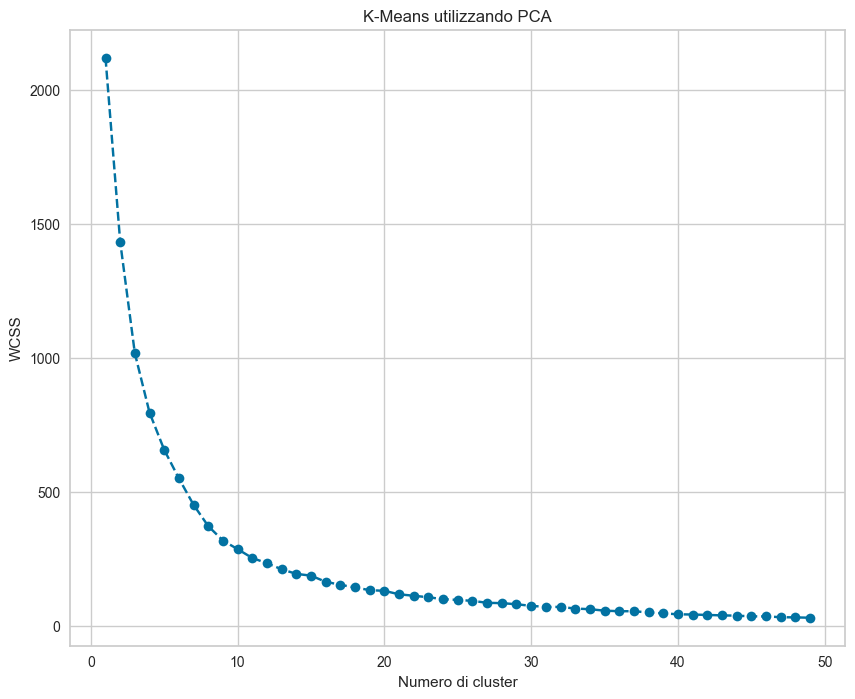

In [7]:
#prendiamo l'80% della varianza comulativa
scores_pca = KMeans.apply_pca(df_player_stats_std,3)
wcss = KMeans.get_wcss(scores_pca)
kmeans_pca = KMeans.plot_wcss_and_apply_kMeans(wcss,scores_pca)

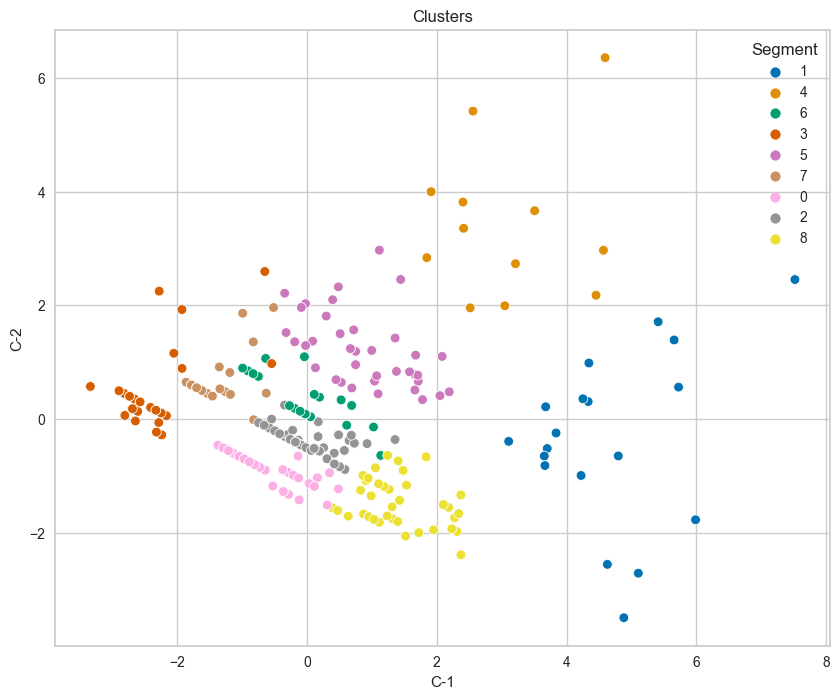

,manager_id,n_appearances,n_wc,goals_difference,win_rate,lose_rate,draw_rate,n_wc_wins_rate,C-1,C-2,C-3,Segm K-means PCA,Segment
0,M-253,9,2,15,0.888889,0.000000,0.111111,1.000000,5.986327,-1.766128,-1.444556,1,1
1,M-022,18,3,8,0.500000,0.166667,0.333333,0.333333,4.453900,2.178309,-0.789774,4,4
2,M-024,14,2,11,0.571429,0.142857,0.285714,0.500000,4.332697,0.310047,-0.533697,1,1
3,M-313,4,1,12,1.000000,0.000000,0.000000,1.000000,4.881941,-3.487098,-1.268568,1,1
4,M-297,21,3,13,0.666667,0.190476,0.142857,0.333333,5.410228,1.711302,-1.714910,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,M-352,4,1,3,0.500000,0.500000,0.000000,0.000000,0.117011,-1.178863,-0.636801,0,0
353,M-353,5,1,3,0.800000,0.200000,0.000000,0.000000,1.239228,-1.699714,-0.320665,8,8
354,M-354,14,4,-2,0.214286,0.428571,0.357143,0.000000,1.914741,3.997017,-0.862934,4,4
355,M-355,3,1,-4,0.000000,0.666667,0.333333,0.000000,-1.614914,0.504156,0.518017,7,7


In [8]:
df_segm_pca_kmeans = KMeans.concat_df(df_manager_stats,scores_pca,kmeans_pca)
KMeans.view_kmeans_results_2d(df_segm_pca_kmeans,scores_pca,kmeans_pca)

0.48


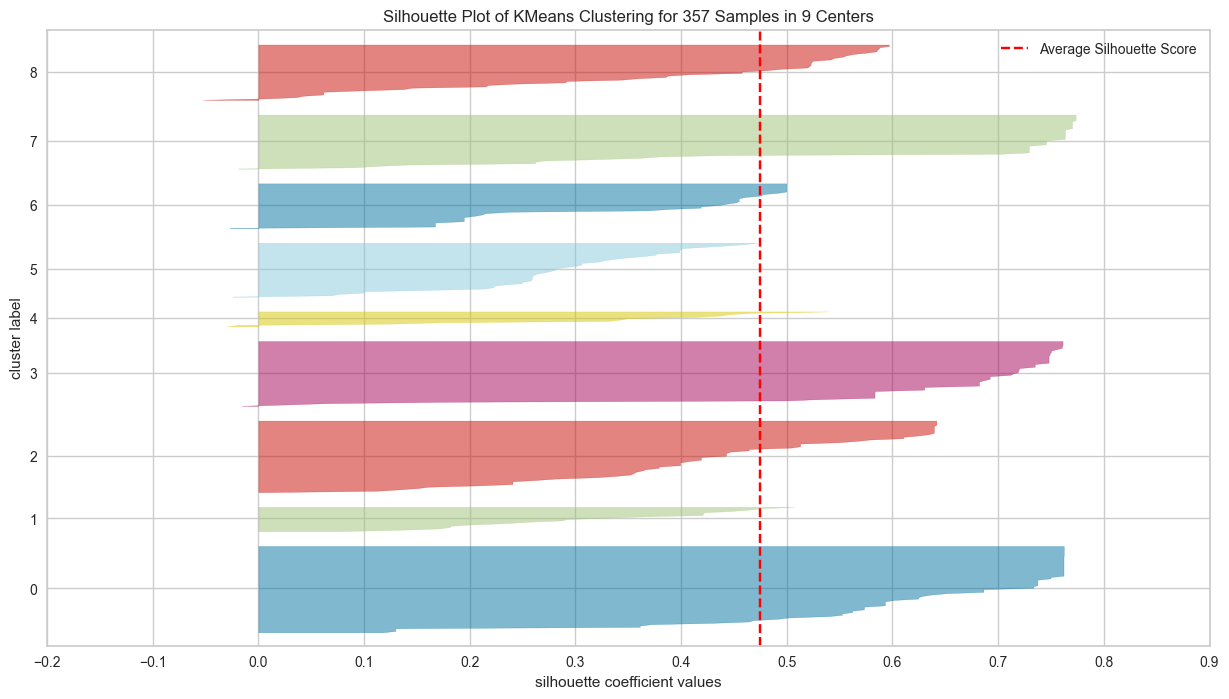

In [9]:
KMeans.evaluation(scores_pca,kmeans_pca)


8.979386221144123e-17 0.7559289460184544
(65, 7)
-1.2354361477031816e-16 1.0
(19, 7)
2.4671622769447924e-16 0.8451542547285166
(54, 7)
1.9420810926387577e-17 0.9258200997725515
(49, 7)
-5.2867763077388404e-17 0.9999999999999999
(12, 7)
2.939963410157209e-17 0.9258200997725514
(41, 7)
-3.358657889622322e-17 0.8451542547285166
(34, 7)
1.02125044773882e-16 0.9258200997725515
(41, 7)
8.911994347331189e-17 0.8451542547285166
(42, 7)


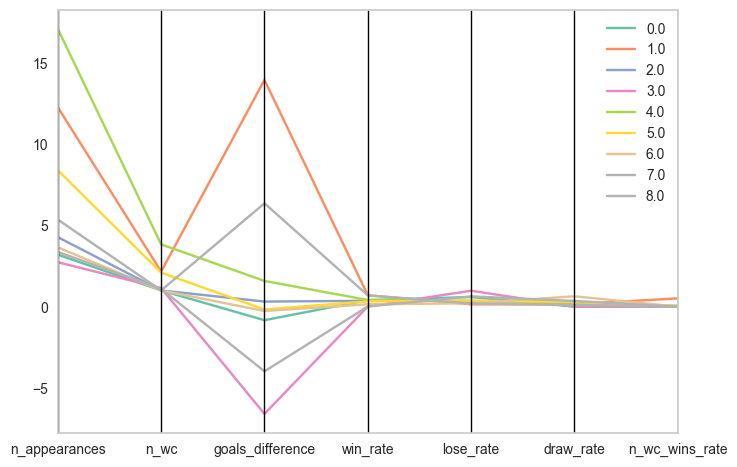

In [10]:
import KMeans
df_manager = pd.read_csv(PATH_FROM_READ_ANALYSIS+"managers.csv")
df_segm_pca_kmeans_2 = df_manager[["manager_id","family_name","given_name","country_name"]].merge(df_segm_pca_kmeans,how="right",on="manager_id")
path_save = "clusters/clusters_managers/"
KMeans.save_clusters_in_csv_files(df_segm_pca_kmeans_2,scores_pca,path_save)
centroids = KMeans.calculate_centroids(df_segm_pca_kmeans_2,scores_pca,path_save,4)
#show centroids
parallel_coordinates(centroids,'group',colormap=plt.get_cmap("Set2"))

plt.show()

(357, 3)


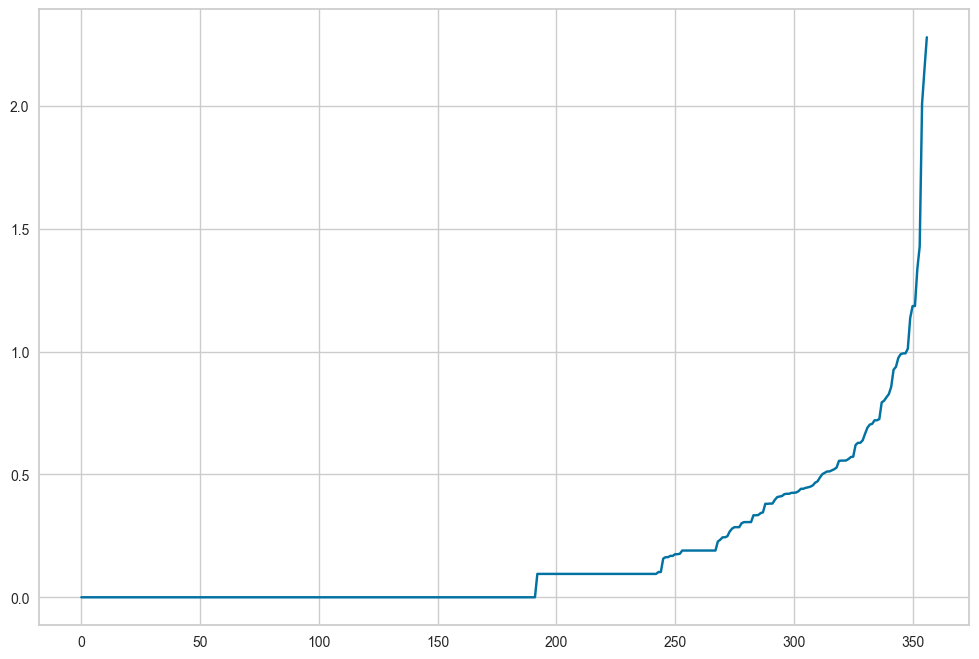

In [6]:
#DB-SCAN

from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scores_pca)
distances, indices = nbrs.kneighbors(scores_pca)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])
print(scores_pca.shape)

In [15]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.7, min_samples=20).fit(scores_pca)
ymeans = db.labels_
print(set(ymeans))
df_segm_pca_dbScan= pd.concat([df_manager_stats.reset_index(drop=True),pd.DataFrame(ymeans)],axis=1)
df_segm_pca_dbScan=KMeans.concat_df(df_manager_stats.reset_index(drop=True),scores_pca,db)
#df_segm_pca_dbScan_2 = df_manager_stats[["manager_id","family_name","given_name","country_name"]].merge(df_segm_pca_dbScan,how="right",on="player_id")
df2 = pd.DataFrame()
for i in range(-1,len(set(ymeans))-1):
    df = df_segm_pca_dbScan[df_segm_pca_dbScan["Segm K-means PCA"]==i]
    df.to_csv("clusters/clusters_managers_dbscan/cluster_"+str(i)+".csv",index=False)
    #df = df[["total_games_played","n_minutes_played","n_tournaments","n_tournaments_played","total_final_match_played","n_wc_wins","total_goals","total_penalty_scored"]]
    #,"yellow_card","red_card","total_own_goals"
    #average = df.mean()
    #total = df.count()
    #average.name = 'mean'
    #total.name = 'total'
    #df2 = df2.append(average)
    #df2 = df2.append(total)
dbscan_silhuouette = silhouette_score(scores_pca,db.labels_).round(2)
print(dbscan_silhuouette)
#df2
df_segm_pca_dbScan
#db = DBSCAN(eps=1.8, min_samples=5)
#visualizer = SilhouetteVisualizer(db, colors='yellowbrick',estimator=db)

#plt.figure(figsize=(15,8))
#visualizer.fit(scores_pca)        # Fit the data to the visualizer
#visualizer.show()     


{0, 1, 2, 3, -1}
0.23


,manager_id,n_appearances,n_wc,goals_difference,win_rate,lose_rate,draw_rate,n_wc_wins_rate,C-1,C-2,C-3,Segm K-means PCA,Segment
0,M-253,9,2,15,0.888889,0.000000,0.111111,1.000000,5.986327,-1.766128,-1.444556,-1,NaN
1,M-022,18,3,8,0.500000,0.166667,0.333333,0.333333,4.453900,2.178309,-0.789774,-1,NaN
2,M-024,14,2,11,0.571429,0.142857,0.285714,0.500000,4.332697,0.310047,-0.533697,-1,NaN
3,M-313,4,1,12,1.000000,0.000000,0.000000,1.000000,4.881941,-3.487098,-1.268568,-1,NaN
4,M-297,21,3,13,0.666667,0.190476,0.142857,0.333333,5.410228,1.711302,-1.714910,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,M-352,4,1,3,0.500000,0.500000,0.000000,0.000000,0.117011,-1.178863,-0.636801,3,3
353,M-353,5,1,3,0.800000,0.200000,0.000000,0.000000,1.239228,-1.699714,-0.320665,3,3
354,M-354,14,4,-2,0.214286,0.428571,0.357143,0.000000,1.914741,3.997017,-0.862934,-1,NaN
355,M-355,3,1,-4,0.000000,0.666667,0.333333,0.000000,-1.614914,0.504156,0.518017,1,1


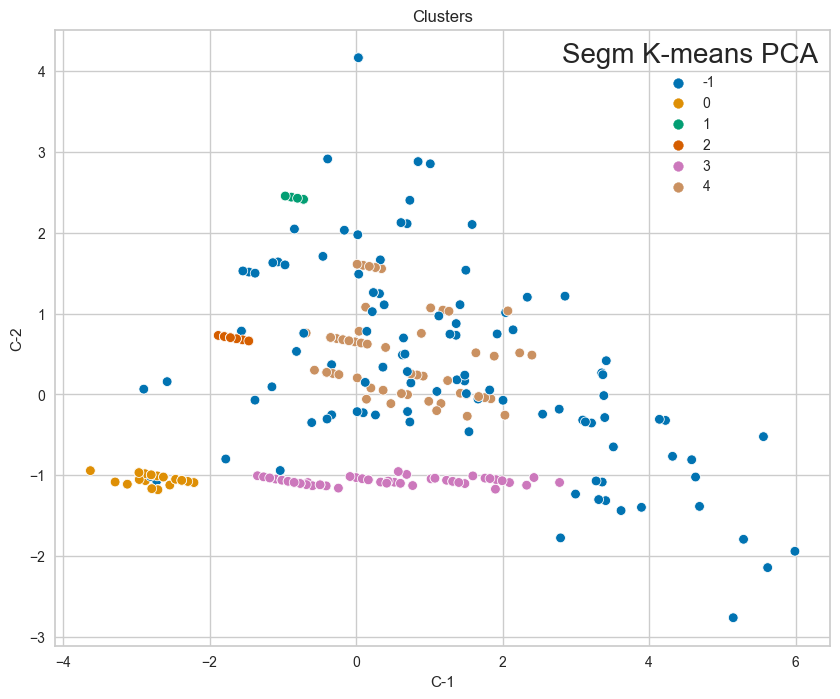

In [67]:
#x_axis=df_segm_pca_dbScan['C-1']
#y_axis=df_segm_pca_dbScan['C-2']
#colors = db.labels_
#plt.scatter(x_axis, y_axis, c = colors)
x_axis=df_segm_pca_dbScan['C-1']
y_axis=df_segm_pca_dbScan['C-2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis,hue=df_segm_pca_dbScan['Segm K-means PCA'],palette='colorblind')
#plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')
plt.title('Clusters')
plt.show()


In [7]:
#Metodo per trovare eps
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
    if(number_of_clusters > 2):
        silhouette_s = silhouette_score(scores_pca,dbscan_model_.labels_).round(2)    
    else: 
        silhouette_s =1
    return(noise_mean_distance, number_of_clusters, silhouette_s)

In [8]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 3, 0.1)]
min_samples_to_test = range(10, 60, 3)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

results_silhouette = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric,silhouette_metric = get_metrics(eps, min_samples, scores_pca, iter_)
    
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric
        results_silhouette.loc[eps, min_samples] = silhouette_metric

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]
MIN_SAMPLES: [10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]
ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =  10 | 0.465    5
  2 | Tested with eps = 0.1 and min_samples =  13 | 0.405    2
  3 | Tested with eps = 0.1 and min_samples =  16 |   0.4    2
  4 | Tested with eps = 0.1 and min_samples =  19 |   0.4    2
  5 | Tested with eps = 0.1 and min_samples =  22 | 0.369    1
  6 | Tested with eps = 0.1 and min_samples =  25 | 0.366    1
  7 | Tested with eps = 0.1 and min_samples =  28 | 0.365    1
  8 | Tested with eps = 0.1 and min_samples =  31 | 0.336    0
  9 | Tested with eps = 0.1 and min_samples =  34 | 0.336    0
 10 | Tested with eps = 0.1 and min_samples =  37 | 0.336    0
 11 |

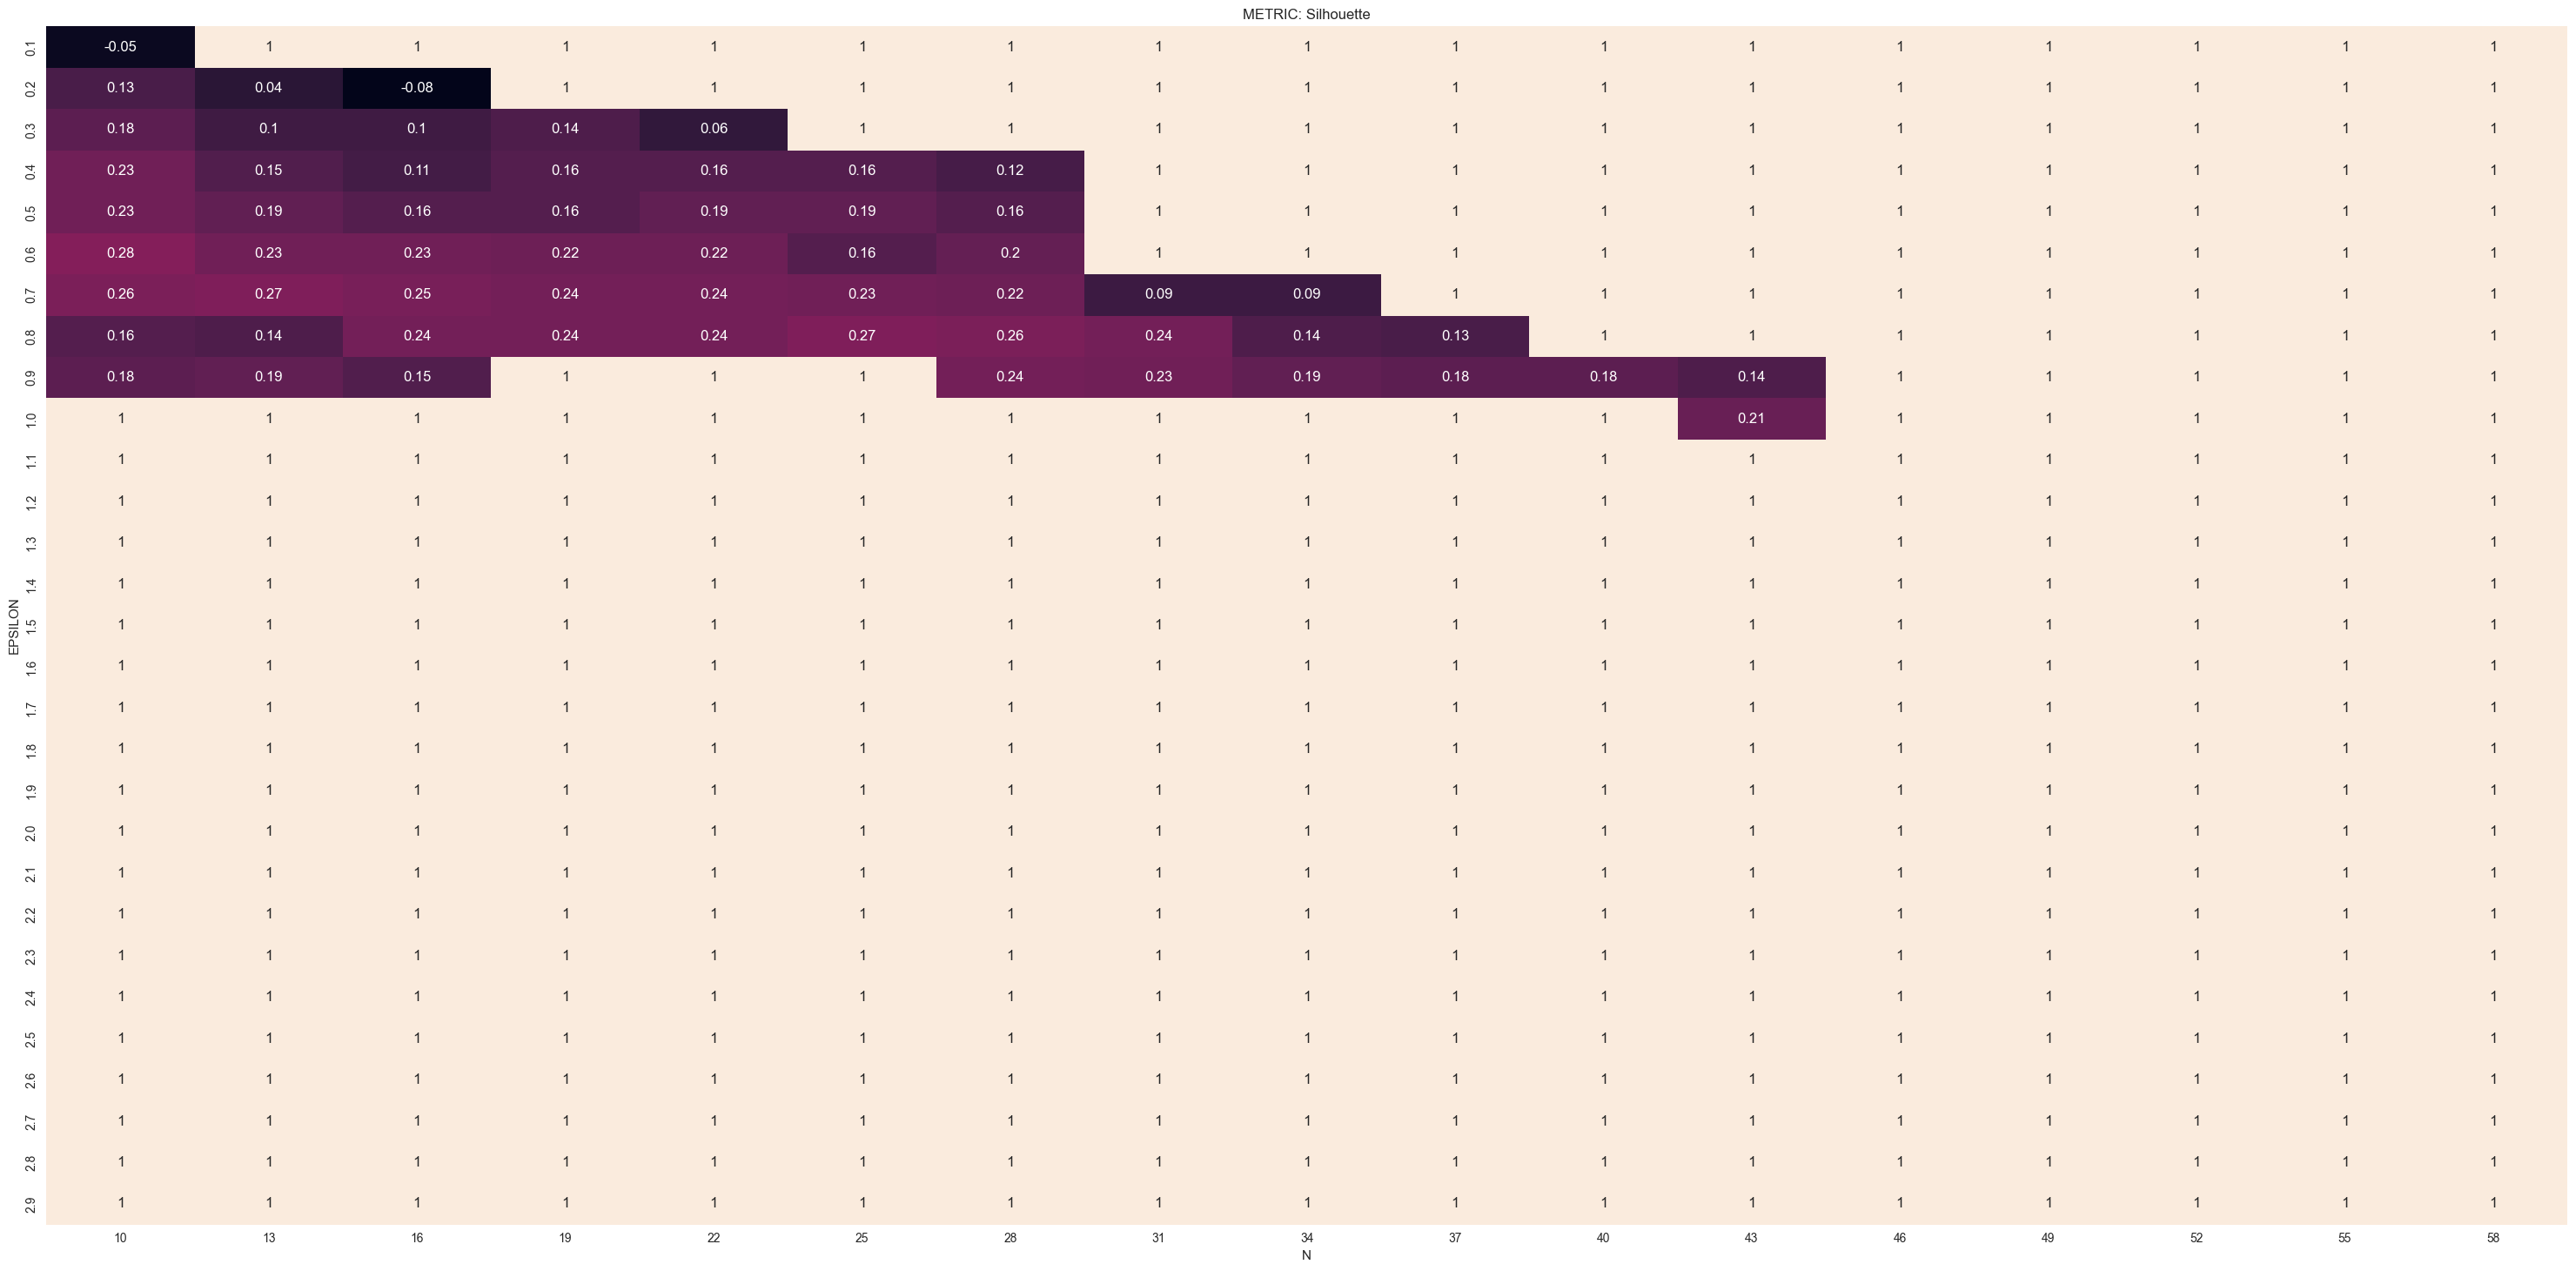

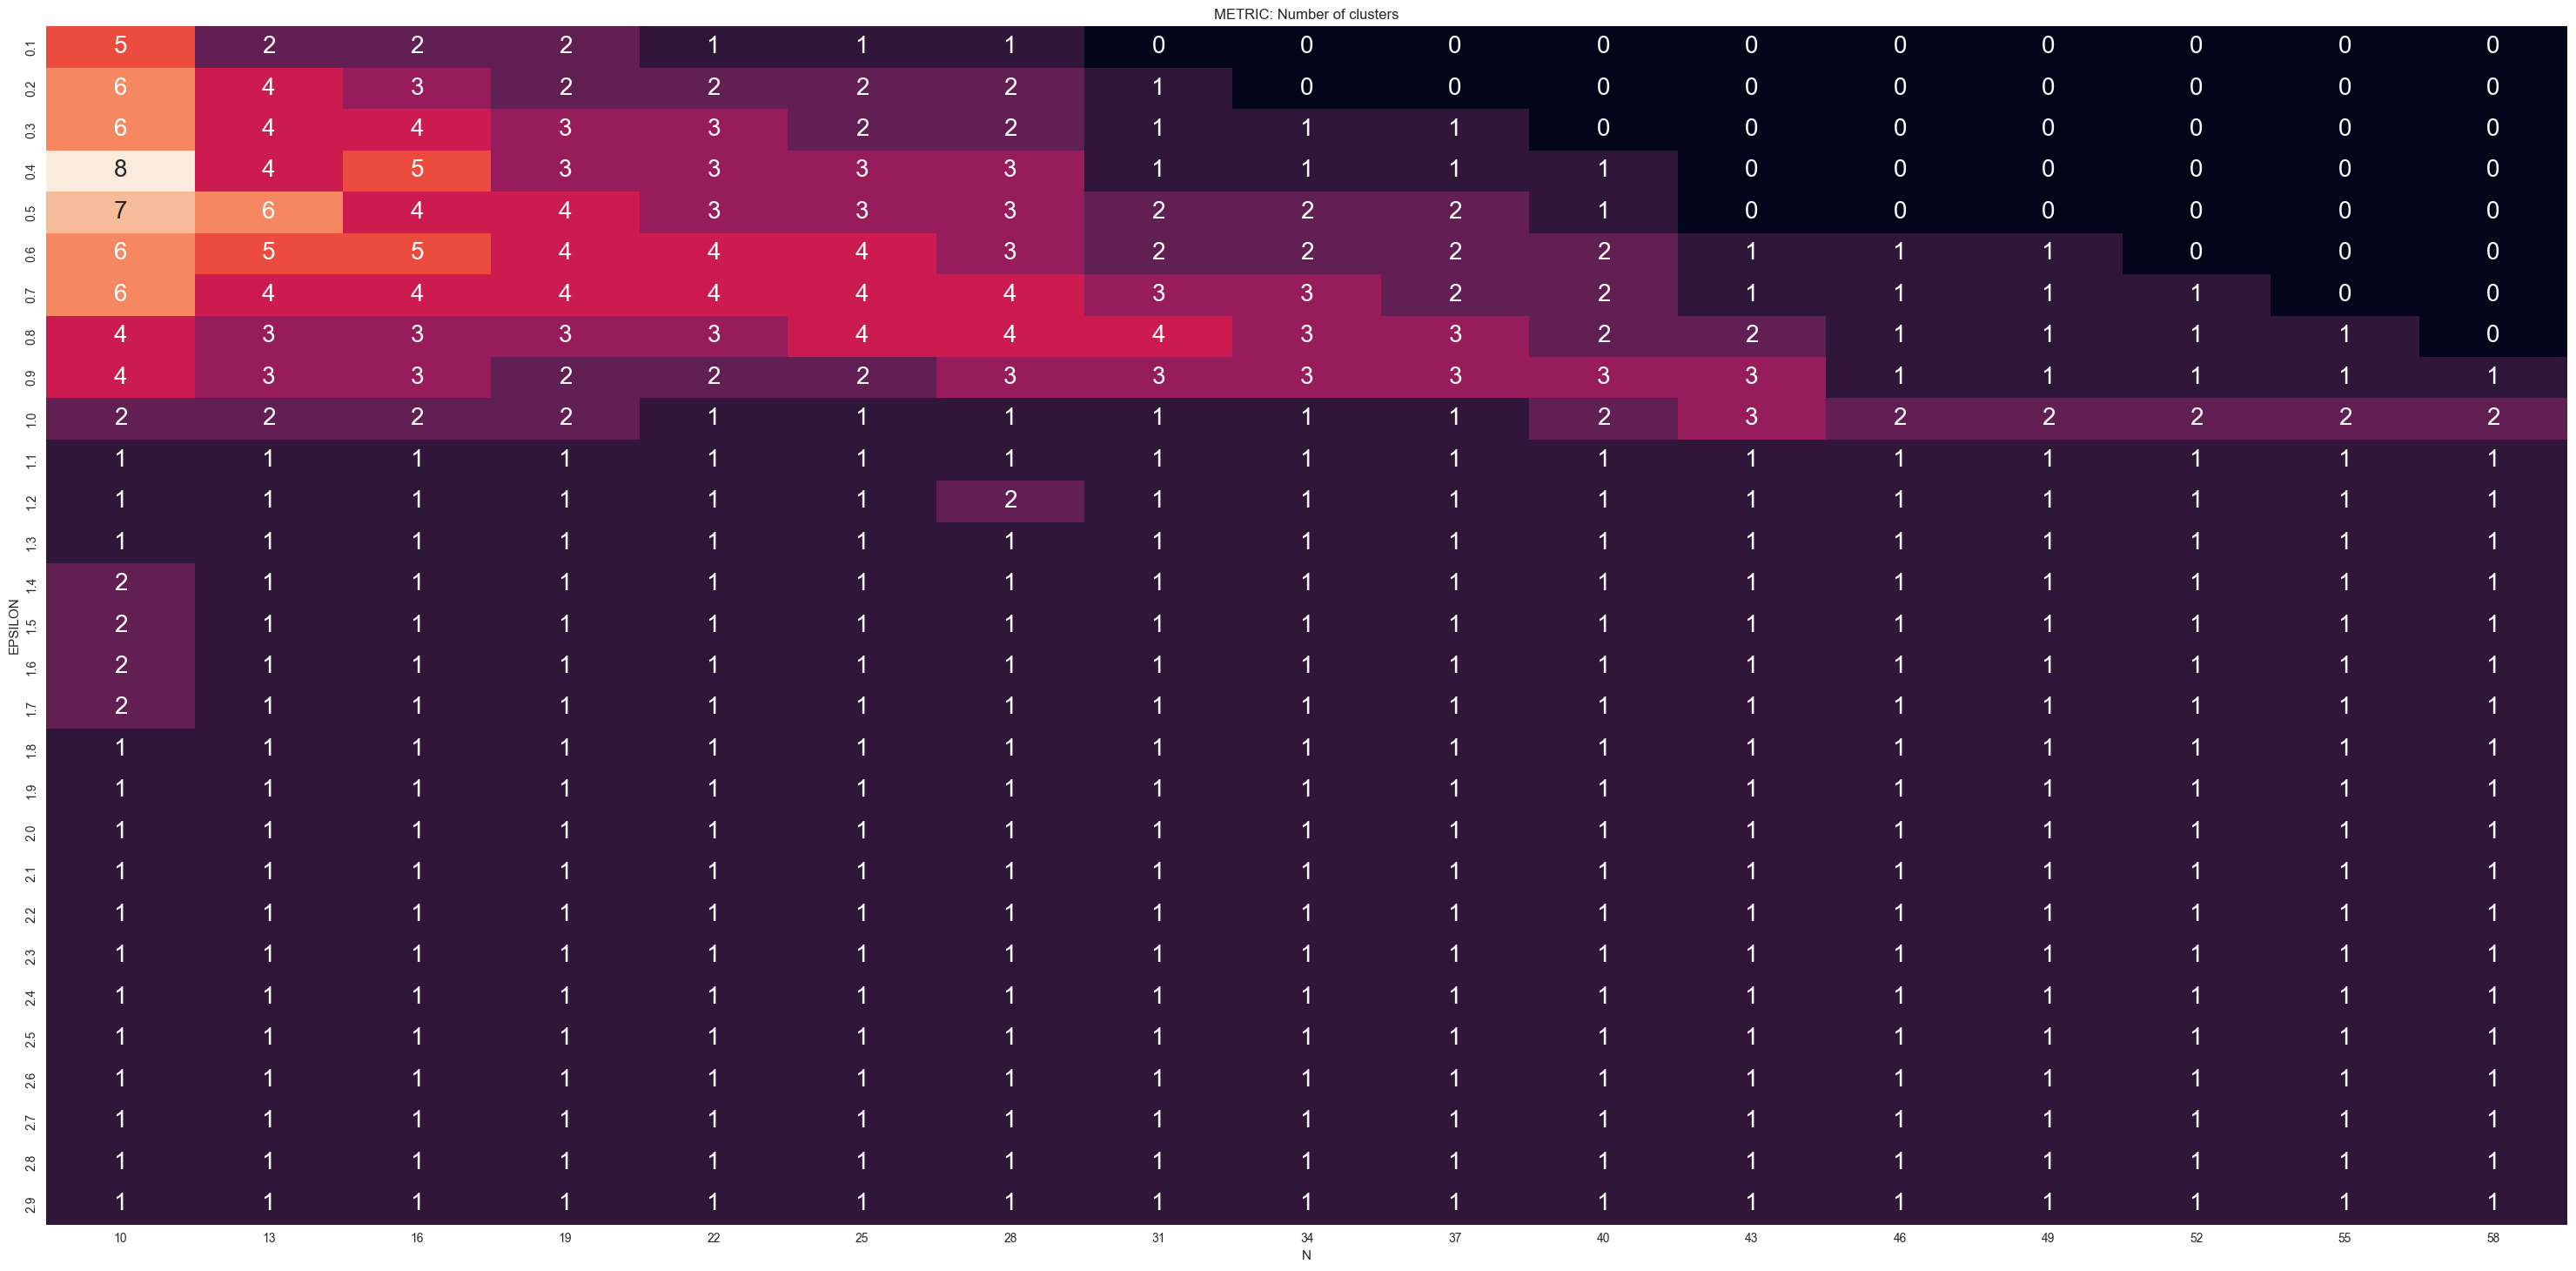

In [9]:
fig, (ax1) = plt.subplots(1, 1, figsize=(30,15) )

#sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
#sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")
sns.heatmap(results_silhouette, annot = True, ax = ax1, cbar = False).set_title("METRIC: Silhouette")

ax1.set_xlabel("N"); ax1.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax1.set_ylabel("EPSILON")
plt.rcParams['font.size'] = '20'

plt.tight_layout(); plt.show()

fig, (ax2) = plt.subplots(1, 1, figsize=(30,15) )

#sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")
#sns.heatmap(results_silhouette, annot = True, ax = ax1, cbar = False).set_title("METRIC: Silhouette")

ax2.set_xlabel("N"); ax2.set_xlabel("N")
ax2.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")
plt.rcParams['font.size'] = '20'

plt.tight_layout(); plt.show()

<IPython.core.display.Javascript object>


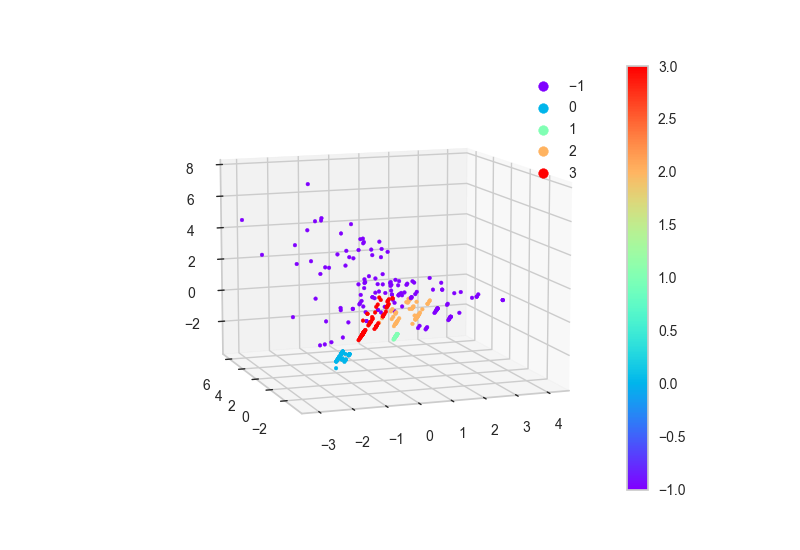

In [17]:
#print(df_segm_pca_kmeans[df_segm_pca_KMeans.player_id =="P-06516"])
#print(df_segm_pca_kmeans[df_segm_pca_KMeans.player_id =="P-03795"])

# Data for a three-dimensional line
z_axis = df_segm_pca_kmeans['C-1']
x_axis=df_segm_pca_kmeans['C-3']
y_axis=df_segm_pca_kmeans['C-2']
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
c = np.tile(df_segm_pca_dbScan['Segm K-means PCA'],1)
sc = ax.scatter(x_axis, y_axis, z_axis, alpha=1, c=c, cmap='rainbow', s=7)
plt.legend(*sc.legend_elements())
plt.colorbar(sc)
plt.show()

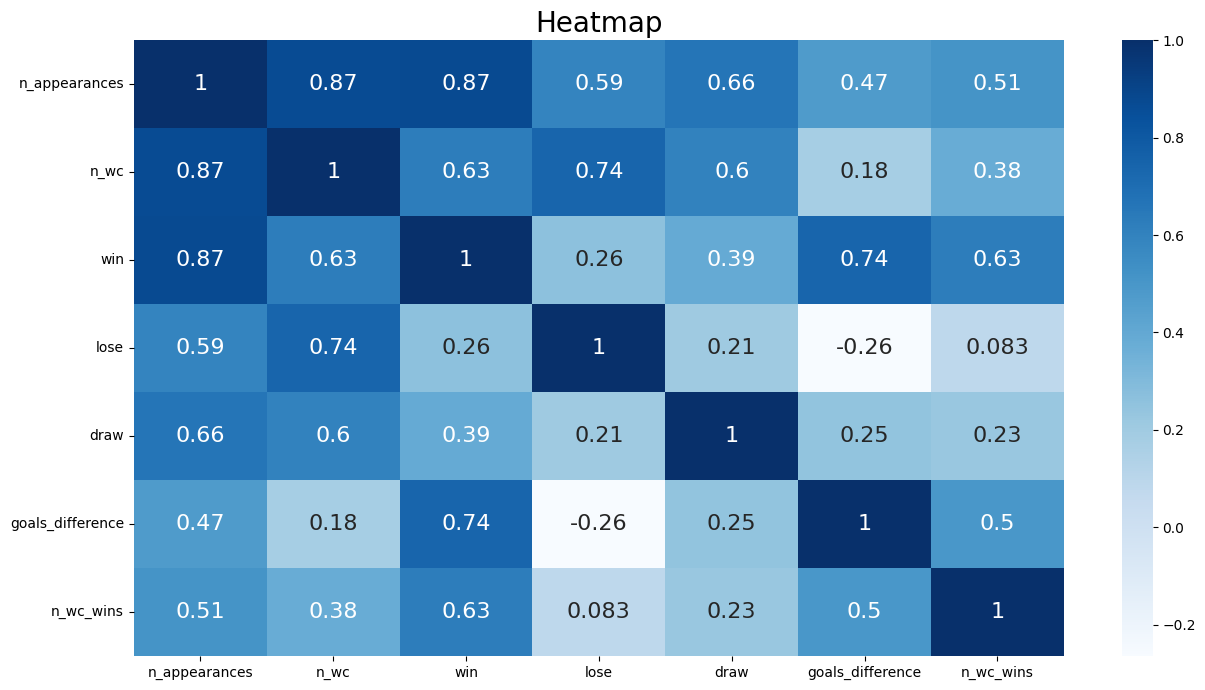

In [3]:
#manager

df_manager_stats = pd.read_csv("./stats/stats_managers.csv")
plt.figure(figsize=(15,8))
sns.heatmap(df_manager_stats.drop(["manager_id"], axis=1).corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()